Multiple Linear Regression

In [5]:
import pandas as pd
import numpy as np
np.float = float
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score




df = pd.read_csv("agricultural_yield.csv")
df.info()
df.dtypes
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      4000 non-null   float64
 1   Seed_Variety                      4000 non-null   int64  
 2   Fertilizer_Amount_kg_per_hectare  4000 non-null   float64
 3   Sunny_Days                        4000 non-null   float64
 4   Rainfall_mm                       4000 non-null   float64
 5   Irrigation_Schedule               4000 non-null   int64  
 6   Yield_kg_per_hectare              4000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 218.9 KB


,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [26]:
X = df[['Rainfall_mm', 'Fertilizer_Amount_kg_per_hectare', 'Soil_Quality', 'Seed_Variety', 'Sunny_Days', 'Irrigation_Schedule']]
y = df['Yield_kg_per_hectare']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [29]:
y_pred = model.predict(X_test)
print(y_pred)
print(df.isnull().sum())
df = df.dropna()


[ 439.1975805   666.33209798 1076.94191683  664.21281882  808.02298804
  996.98407306  313.77572225  599.49240463  459.04167512  808.6592018
  604.04847914  687.23421527  634.73571196  749.03488482  853.92218459
  687.93014874  963.13199292  468.23920474  576.54686601  365.26800046
  801.43980025  803.11719055  363.29593982  826.97963685 1014.00877906
  593.75133133  671.48334758  972.21146781  642.99322648  641.35352632
  696.34389969  812.99156483  834.21274195  795.2222746   464.01757953
  719.08330073  727.71450606 1016.34576828  185.19401708  666.31133171
  928.96688352  892.94425603  789.43259421  756.64848685  600.40814516
  836.04318603  611.14617154  570.60052803  602.09300718  797.12370327
  621.0098251   784.02214988  848.83223874  768.07645087  436.76237678
  720.14334399  648.45392607  773.4420461   684.0855623   699.60892114
  639.71729235  705.60284519  980.50914235  954.70567172  722.79206842
  377.32740346  895.2070779   475.31493984  847.42666411  605.58517588
  786.2

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score  :", r2)


MAE : 38.99044966412433
MSE: 2337.638239045568
RMSE: 48.349128627572675
R2 Score  : 0.9405847109249212


No handles with labels found to put in legend.


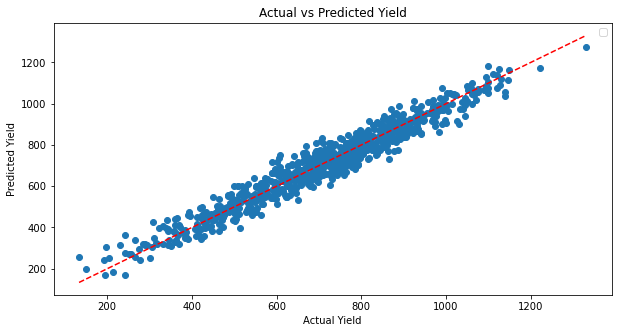

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red', linestyle="--")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.legend()
plt.show()

In [37]:
import joblib

joblib.dump(model,"agro_yield.pkl")
model = joblib.load("agro_yield.pkl")